In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

## Make API Call

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#### You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

## Generate Random World Cities

#### The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

649

## Get the City Weather Data

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


### Loop Through the List of Cities and Build the City URL

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | navrongo
Processing Record 5 of Set 1 | klaksvik
Processing Record 6 of Set 1 | toliary
City not found. Skipping...
Processing Record 7 of Set 1 | velka bites
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | morro bay
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | necochea
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | ankpa
Processing Record 20 of Set 1 | sola
Processing Record 21 of Set 1 | berlevag
Processing Record 22 of Set 1 | mukhen
Processing Record 23 of Set 1 | ginda
Proc

Processing Record 35 of Set 4 | port alfred
Processing Record 36 of Set 4 | anadyr
Processing Record 37 of Set 4 | pinheiro
Processing Record 38 of Set 4 | namtsy
Processing Record 39 of Set 4 | mandan
Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | lahat
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | mbengwi
Processing Record 45 of Set 4 | cayenne
Processing Record 46 of Set 4 | sao miguel do araguaia
Processing Record 47 of Set 4 | tecoanapa
Processing Record 48 of Set 4 | marawi
Processing Record 49 of Set 4 | sterling
Processing Record 50 of Set 4 | avera
Processing Record 1 of Set 5 | terney
Processing Record 2 of Set 5 | lasa
Processing Record 3 of Set 5 | carutapera
Processing Record 4 of Set 5 | sorland
Processing Record 5 of Set 5 | hobart
Processing Record 6 of Set 5 | beroroha
Processing Record 7 of Set 5 | sao sebastiao
Processing Record 8 of Set 5 | faanui

Processing Record 27 of Set 8 | jatiwangi
Processing Record 28 of Set 8 | labuan
Processing Record 29 of Set 8 | bo rai
Processing Record 30 of Set 8 | margarita
Processing Record 31 of Set 8 | prince rupert
Processing Record 32 of Set 8 | turukhansk
Processing Record 33 of Set 8 | jacqueville
Processing Record 34 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 35 of Set 8 | jinchang
Processing Record 36 of Set 8 | navalgund
Processing Record 37 of Set 8 | karasjok
Processing Record 38 of Set 8 | hammerfest
Processing Record 39 of Set 8 | corning
Processing Record 40 of Set 8 | khash
Processing Record 41 of Set 8 | shitanjing
Processing Record 42 of Set 8 | rockport
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | osmaniye
Processing Record 45 of Set 8 | alekseyevka
Processing Record 46 of Set 8 | kinanah
City not found. Skipping...
Processing Record 47 of Set 8 | bathsheba
Processing Record 48 of Set 8 | mirpur khas
Processing Record 49 of S

Processing Record 12 of Set 12 | hun
Processing Record 13 of Set 12 | broome
Processing Record 14 of Set 12 | chiang klang
Processing Record 15 of Set 12 | codrington
Processing Record 16 of Set 12 | orocue
Processing Record 17 of Set 12 | metro
Processing Record 18 of Set 12 | nizhniy ingash
Processing Record 19 of Set 12 | gubkinskiy
Processing Record 20 of Set 12 | rocha
Processing Record 21 of Set 12 | carira
Processing Record 22 of Set 12 | manta
Processing Record 23 of Set 12 | mehamn
Processing Record 24 of Set 12 | itaituba
Processing Record 25 of Set 12 | cartagena
Processing Record 26 of Set 12 | urubicha
Processing Record 27 of Set 12 | kaduna
Processing Record 28 of Set 12 | maniitsoq
Processing Record 29 of Set 12 | iskateley
Processing Record 30 of Set 12 | severnyy
Processing Record 31 of Set 12 | narayanavanam
Processing Record 32 of Set 12 | rorvik
Processing Record 33 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 34 of Set 12 | ouallam
Processing R

In [8]:
print(len(city_data))

591


## Create a DataFrame of City Weather Data

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,21.22,73,90,13.80,US,2021-10-16 13:45:49
1,Kapaa,22.0752,-159.3190,73.72,82,1,14.97,US,2021-10-16 13:45:50
2,Navrongo,10.8956,-1.0921,99.48,23,27,4.21,GH,2021-10-16 13:45:50
3,Klaksvik,62.2266,-6.5890,45.52,67,99,6.96,FO,2021-10-16 13:45:50
4,Velka Bites,49.2884,16.2274,55.78,55,20,6.91,CZ,2021-10-16 13:45:51
5,Albany,42.6001,-73.9662,71.37,87,100,1.01,US,2021-10-16 13:45:52
6,Ushuaia,-54.8000,-68.3000,33.42,86,90,27.63,AR,2021-10-16 13:45:52
7,Rikitea,-23.1203,-134.9692,74.37,77,12,6.85,PF,2021-10-16 13:45:52
8,Lagoa,39.0500,-27.9833,69.69,86,100,22.53,PT,2021-10-16 13:45:53
9,Morro Bay,35.3658,-120.8499,66.56,47,0,1.99,US,2021-10-16 13:45:53


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-10-16 13:45:49,71.2906,-156.7887,21.22,73,90,13.80
1,Kapaa,US,2021-10-16 13:45:50,22.0752,-159.3190,73.72,82,1,14.97
2,Navrongo,GH,2021-10-16 13:45:50,10.8956,-1.0921,99.48,23,27,4.21
3,Klaksvik,FO,2021-10-16 13:45:50,62.2266,-6.5890,45.52,67,99,6.96
4,Velka Bites,CZ,2021-10-16 13:45:51,49.2884,16.2274,55.78,55,20,6.91
...,...,...,...,...,...,...,...,...,...
586,Cabedelo,BR,2021-10-16 13:49:37,-6.9811,-34.8339,86.67,59,29,14.38
587,Isla Vista,US,2021-10-16 13:49:37,34.4133,-119.8610,72.43,18,0,4.59
588,Oranjemund,NA,2021-10-16 13:49:38,-28.5500,16.4333,60.85,53,4,23.38
589,Kudahuvadhoo,MV,2021-10-16 13:49:38,2.6708,72.8944,82.92,78,100,24.92


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs. Temperature

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

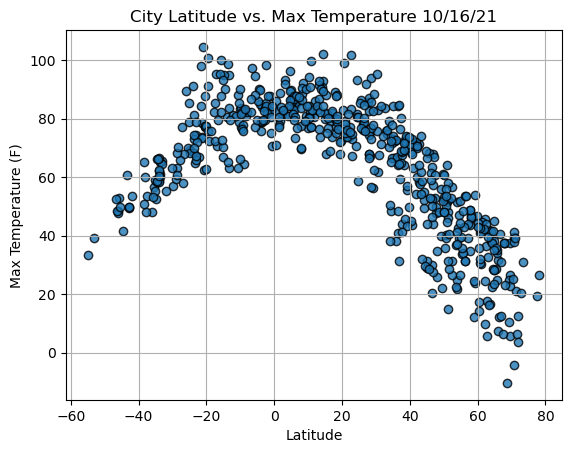

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

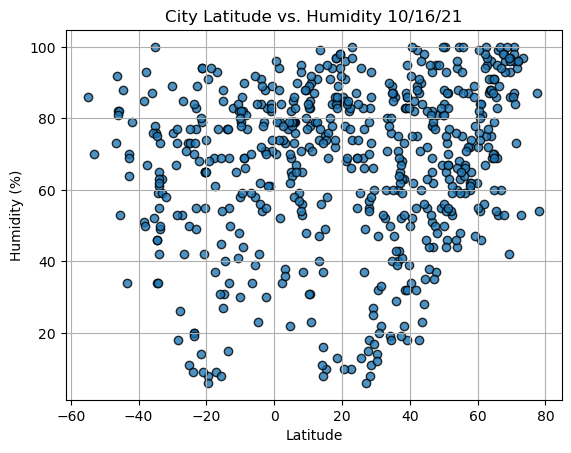

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

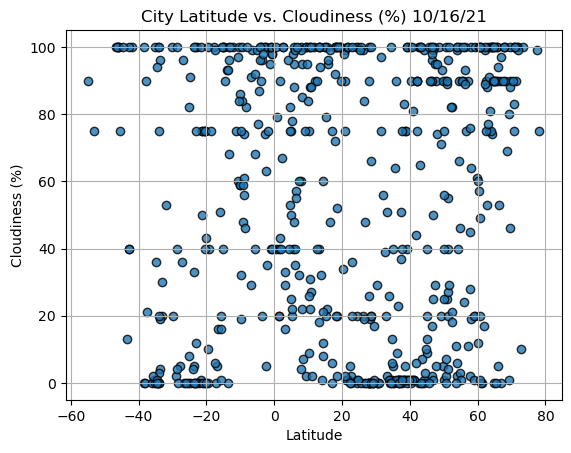

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

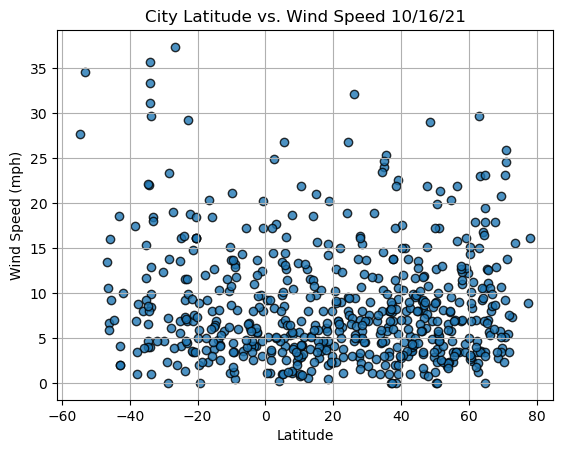

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Use Linear Regression to Find the Relationship Between Variables

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Create the Hemisphere DataFrames

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Necochea
Country                        AR
Date          2021-10-16 13:45:55
Lat                      -38.5473
Lng                      -58.7368
Max Temp                    65.03
Humidity                       51
Cloudiness                      0
Wind Speed                  17.45
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
586    False
587     True
588    False
589     True
590     True
Name: Lat, Length: 591, dtype: bool

#### If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame.

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-10-16 13:45:49,71.2906,-156.7887,21.22,73,90,13.80
1,Kapaa,US,2021-10-16 13:45:50,22.0752,-159.3190,73.72,82,1,14.97
2,Navrongo,GH,2021-10-16 13:45:50,10.8956,-1.0921,99.48,23,27,4.21
3,Klaksvik,FO,2021-10-16 13:45:50,62.2266,-6.5890,45.52,67,99,6.96
4,Velka Bites,CZ,2021-10-16 13:45:51,49.2884,16.2274,55.78,55,20,6.91
...,...,...,...,...,...,...,...,...,...
582,Dodge City,US,2021-10-16 13:49:35,37.7528,-100.0171,41.25,59,1,5.99
583,Bonfim,BR,2021-10-16 13:49:35,3.0833,-59.9500,91.89,36,29,5.12
587,Isla Vista,US,2021-10-16 13:49:37,34.4133,-119.8610,72.43,18,0,4.59
589,Kudahuvadhoo,MV,2021-10-16 13:49:38,2.6708,72.8944,82.92,78,100,24.92


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-10-16 13:45:49,71.2906,-156.7887,21.22,73,90,13.80
1,Kapaa,US,2021-10-16 13:45:50,22.0752,-159.3190,73.72,82,1,14.97
2,Navrongo,GH,2021-10-16 13:45:50,10.8956,-1.0921,99.48,23,27,4.21
3,Klaksvik,FO,2021-10-16 13:45:50,62.2266,-6.5890,45.52,67,99,6.96
4,Velka Bites,CZ,2021-10-16 13:45:51,49.2884,16.2274,55.78,55,20,6.91


#### create DataFrames for the Northern and Southern Hemispheres' data

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

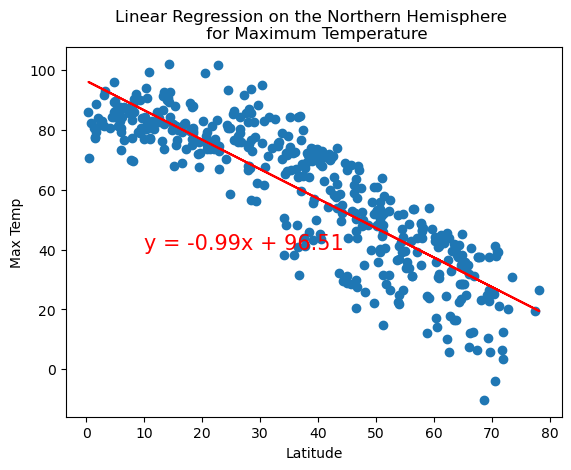

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

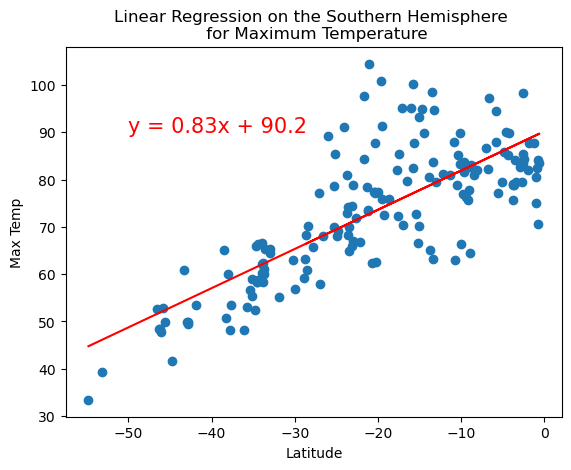

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

## Find the Correlation Between Latitude and Percent Humidity

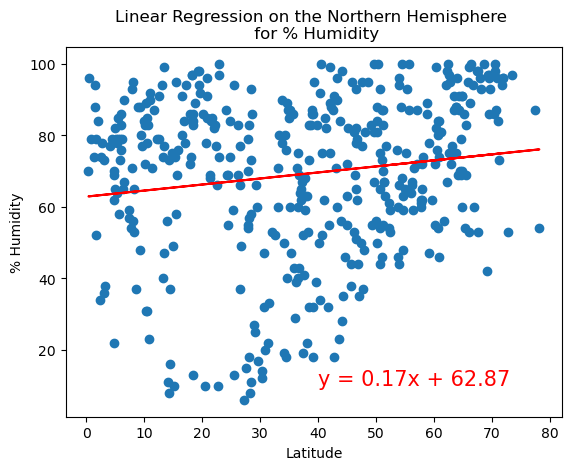

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

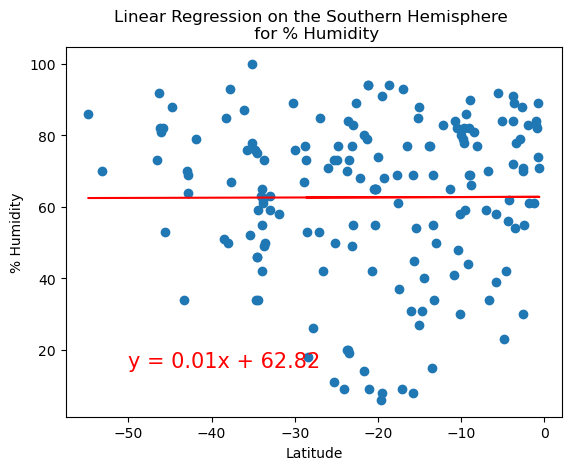

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

## Find the Correlation Between Latitude and Percent Cloudiness

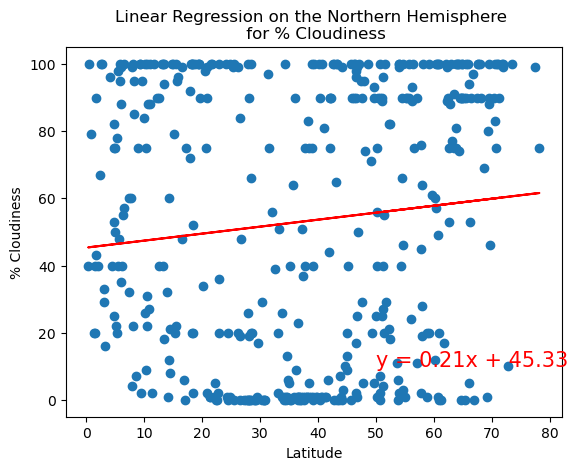

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(50,10))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

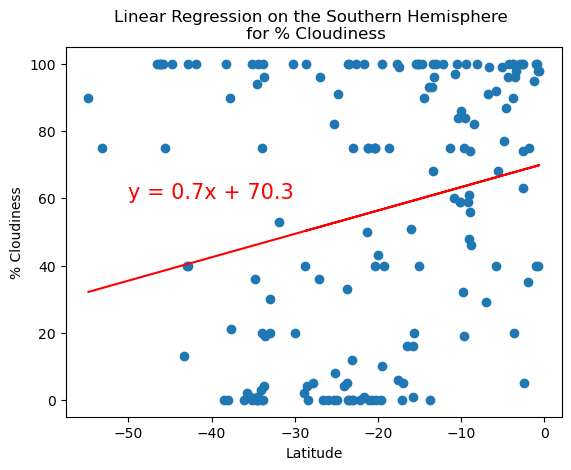

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

## Find the Correlation Between Latitude and Wind Speed

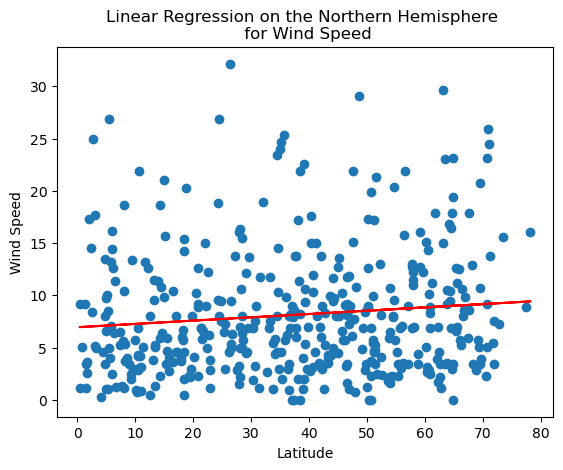

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

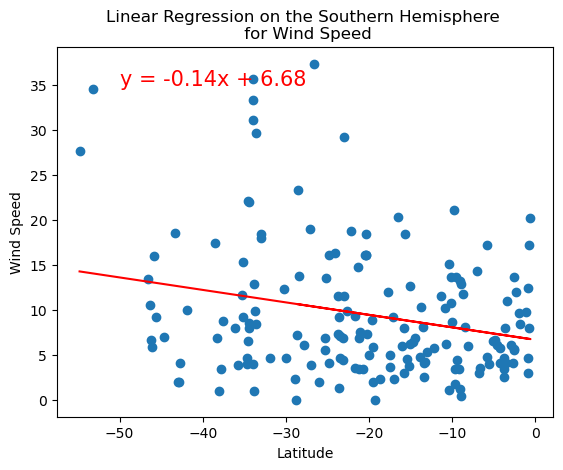

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))